In [ ]:
from principal_DBN_alpha import *
from principal_RBM_alpha import *
from principal_DNN_MNIST import *
from utils import *
from tqdm import tqdm, notebook
import matplotlib.pyplot as plt

# Etude sur Binary AlphaDigit

In [ ]:
data = lire_alpha_digit(caracs, path_data=path_data)

## RBM 

On entraine un RBM sur les données de Binary AlphaDigit puis on genere des images à partir de ce qu'il a appris.

In [14]:
neurons = 200
epochs = 200
nb_pixels = 20*16
learning_rate = 0.1
gibbs_steps = 200

On entraine un RBM pour chaque caractère.

In [ ]:
list_rbm_caracs = []
for carac in notebook.tqdm(list(caracs.keys()), desc="Characters", unit="char", leave=False):
    data = lire_alpha_digit([carac], path_data)
    nb_pixels = data[0].shape[1]
    rbm = RBM(p = nb_pixels, q = neurons)
    rbm.train_RBM(x=data, epochs=epochs, lr=learning_rate, show_progress=True)
    list_rbm_caracs.append(rbm)

On genere des images des caractères en utilisant la méthode de Gibbs Sampling.

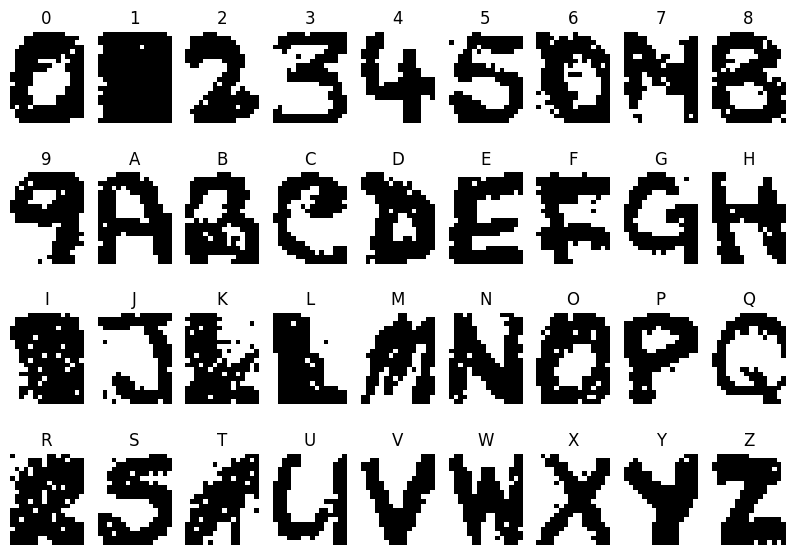

In [ ]:
fig, axs = plt.subplots(4, 9, figsize=(10, 7), sharex=True, sharey=True)
axs = axs.flatten()

for i, rbm in enumerate(list_rbm_caracs):
    img = rbm.generer_image_RBM(gibbs_steps, 1)  # 1 image with 100 Gibbs steps
    
    img_reshaped = img[0].cpu().reshape(20, 16)
    
    axs[i].imshow(img_reshaped, cmap='Greys')
    axs[i].set_title(list(caracs.keys())[i])
    axs[i].axis('off')

# Adjust layout to prevent overlap
# plt.tight_layout()
plt.show()
